In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as widgets

#### https://biocycle.atmos.colostate.edu/shiny/Milankovitch/

Download files from http://vo.imcce.fr/insola/earth/online/earth/earth.html

In [4]:
! wget -nc  http://vo.imcce.fr/insola/earth/online/earth/La2004/INSOLN.LA2004.BTL.250.ASC
! wget -nc  http://vo.imcce.fr/insola/earth/online/earth/La2004/INSOLN.LA2004.BTL.ASC

File ‘INSOLN.LA2004.BTL.250.ASC’ already there; not retrieving.

File ‘INSOLN.LA2004.BTL.ASC’ already there; not retrieving.



In [5]:
df1 = pd.read_csv('INSOLN.LA2004.BTL.250.ASC', delimiter=r'\s+', names=['t', 'e', 'eps', 'pibar'])
df1.set_index('t', inplace=True)
df1.sort_index(ascending=True, inplace=True)

df2 = pd.read_csv('INSOLP.LA2004.BTL.ASC', delimiter=r'\s+', names=['t', 'e', 'eps', 'pibar'])
df2.set_index('t', inplace=True)
df2.sort_index(ascending=True, inplace=True)

df2['e'] = df2['e'].str.replace('D','E')
df2['e'] = df2['e'].astype(float)

df2['eps'] = df2['eps'].str.replace('D','E')
df2['eps'] = df2['eps'].astype(float)

df2['pibar'] = df2['pibar'].str.replace('D','E')
df2['pibar'] = df2['pibar'].astype(float)

df = pd.concat([df1, df2])

df['eccentricity'] = df['e']
df['perihelion'] = df['pibar']
df['obliquity'] = 180. * df['eps'] / np.pi

df['precession'] = df['eccentricity'] * np.sin(df['perihelion'])

latitude = 65. * np.pi / 180.

df['insolation'] =  1367 * ( 1 + df['eccentricity'] * np.sin(df['perihelion'] + np.pi))**2 * np.sin(latitude) * np.sin(df['eps'])   

df

,e,eps,pibar,eccentricity,perihelion,obliquity,precession,insolation
t,,,,,,,,
-249000.0,0.017722,0.388669,5.878995,0.017722,5.878995,22.269093,-0.006970,476.065726
-248999.0,0.017862,0.387563,0.010612,0.017862,0.010612,22.205724,0.000190,468.052656
-248998.0,0.018027,0.386791,0.426305,0.018027,0.426305,22.161492,0.007454,460.402978
-248997.0,0.018357,0.386396,0.840109,0.018357,0.840109,22.138860,0.013671,454.212985
-248996.0,0.018625,0.386407,1.250226,0.018625,1.250226,22.139490,0.017676,450.543600
...,...,...,...,...,...,...,...,...
20996.0,0.025473,0.394611,4.074812,0.025473,4.074812,22.609562,-0.020469,496.001285
20997.0,0.026019,0.393511,4.359345,0.026019,4.359345,22.546515,-0.024414,498.523231
20998.0,0.026633,0.392498,4.647594,0.026633,4.647594,22.488504,-0.026577,499.408912


(-5000.0, 0.0)

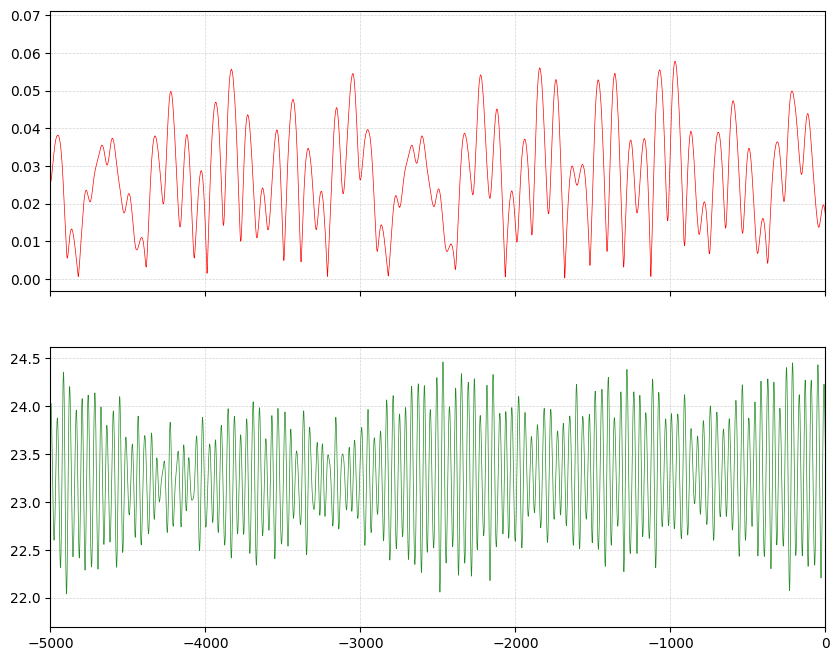

In [6]:
fig, axs = plt.subplots(2, 1, sharex='all', figsize=(10,8)) 

axs[0].plot(df['eccentricity'], color='red', linewidth=0.5)
axs[0].grid(visible=True, which='major', color='lightgray', linestyle='dashed', linewidth=0.5)

axs[1].plot(df['obliquity'], color='forestgreen', linewidth=0.5)
axs[1].grid(visible=True, which='major', color='lightgray', linestyle='dashed', linewidth=0.5)

axs[1].set_xlim([-5000, 0])